In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import seaborn as sns
import cv2

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import os


Using TensorFlow backend.


In [2]:
x_ = list()
y = list()
IMG_SIZE = 128
for i in os.listdir("../input/flowers/flowers/daisy"):
    try:
        path = "../input/flowers/flowers/daisy/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(0)
    except:
        None
for i in os.listdir("../input/flowers/flowers/dandelion"):
    try:
        path = "../input/flowers/flowers/dandelion/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(1)
    except:
        None
for i in os.listdir("../input/flowers/flowers/rose"):
    try:
        path = "../input/flowers/flowers/rose/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(2)
    except:
        None
for i in os.listdir("../input/flowers/flowers/sunflower"):
    try:
        path = "../input/flowers/flowers/sunflower/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(3)
    except:
        None
for i in os.listdir("../input/flowers/flowers/tulip"):
    try:
        path = "../input/flowers/flowers/tulip/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(4)
    except:
        None
x_ = np.array(x_)
from keras.utils.np_utils import to_categorical
y = to_categorical(y,num_classes = 5)

/opt/conda/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



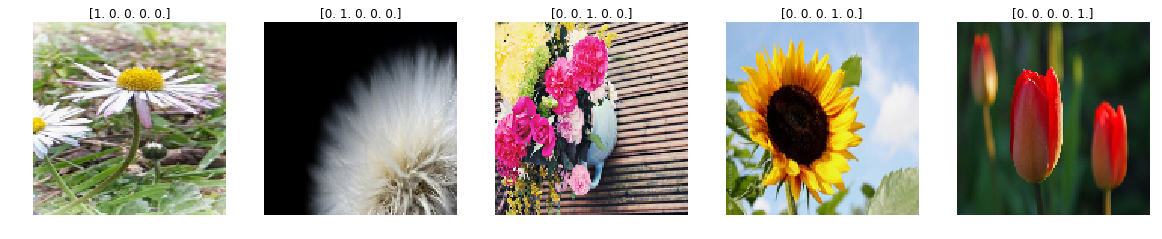

In [3]:
plt.figure(figsize = (20,20))
for i in range(5):
    img = x_[950*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y[950*i])

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size = 0.15,random_state = 42)

In [5]:
# validation and trains split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 42)

In [6]:
x_train.shape

(3122, 128, 128, 3)

In [7]:
y_test.shape

(649, 5)

In [8]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(5,activation="softmax"))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxP

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [10]:
epoch = 75
batch_size = 64

In [11]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rotation_range=60,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    ) 
datagen.fit(x_train)

In [12]:
history = model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                              epochs= epoch,validation_data=(x_val,y_val),
                              steps_per_epoch=48, verbose =2,
                              )

Instructions for updating:
Use tf.cast instead.
Epoch 1/75
 - 15s - loss: 1.7074 - acc: 0.4277 - val_loss: 1.3544 - val_acc: 0.5616
Epoch 2/75
 - 11s - loss: 1.2203 - acc: 0.5458 - val_loss: 1.2338 - val_acc: 0.5362
Epoch 3/75
 - 10s - loss: 1.1049 - acc: 0.5755 - val_loss: 1.3096 - val_acc: 0.5634
Epoch 4/75
 - 11s - loss: 1.0320 - acc: 0.6188 - val_loss: 1.0352 - val_acc: 0.6087
Epoch 5/75
 - 11s - loss: 0.9561 - acc: 0.6411 - val_loss: 1.5266 - val_acc: 0.5254
Epoch 6/75
 - 11s - loss: 0.9433 - acc: 0.6424 - val_loss: 1.0477 - val_acc: 0.6757
Epoch 7/75
 - 11s - loss: 0.8670 - acc: 0.6838 - val_loss: 1.0006 - val_acc: 0.6739
Epoch 8/75
 - 11s - loss: 0.8277 - acc: 0.6853 - val_loss: 0.9248 - val_acc: 0.6649
Epoch 9/75
 - 11s - loss: 0.7986 - acc: 0.6921 - val_loss: 0.8610 - val_acc: 0.6739
Epoch 10/75
 - 11s - loss: 0.7537 - acc: 0.7264 - val_loss: 0.9149 - val_acc: 0.6848
Epoch 11/75
 - 11s - loss: 0.7746 - acc: 0.7113 - val_loss: 1.1829 - val_acc: 0.6178
Epoch 12/75
 - 10s - loss:

In [13]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100))

649/649 [==============================] - 0s 517us/step
Test Accuracy: 79.04%


In [14]:
x_ = np.array(range(len(history.history['loss']))) # get loss values from the history
trace1 = go.Scatter(
        x = x_,
        y = history.history['loss'], # get loss values from the history
        mode = "lines",
        marker = dict(color = "rgba(0,255,0,0.9)"),
        text = "Loss"
)
trace2 = go.Scatter(
        x = x_,
        y = history.history['acc'],# get accuracy values from the history
        mode = "lines",
        marker = dict(color = "rgba(0,0,255,0.9)"),
        text = "Accuracy"
)
data = [trace1,trace2]
layout = dict(title = "Training Accuracy and Loss")
fig = dict(data = data,layout=layout)
iplot(fig)

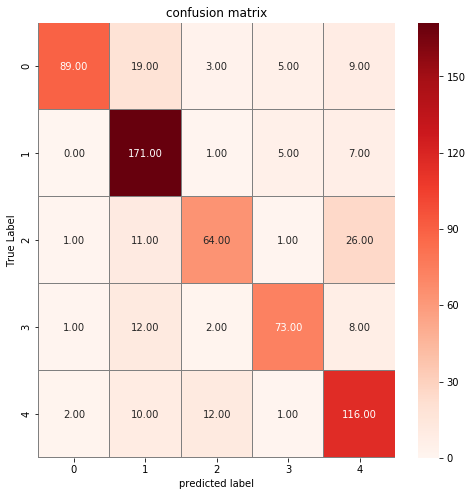

In [15]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()